# Trabajo 2:

## Curso de Álgebra Lineal y Optimización

**Eduardo Carrasco**
Estudiante Doctorado en Ingeniería de Sistemas Complejos

# Función de Rosenbrock

La **función de Rosenbrock**, también conocida como el "valle de Rosenbrock" o la "banana de Rosenbrock", es una función no convexa utilizada como un problema de prueba estándar para algoritmos de optimización. La función se define como:

La función se define matemáticamente de la siguiente manera:

$$
f(x, y) = (1 - x)^2 + 100 \cdot (y - x^2)^2
$$

### Características

- **Objetivo**: La función tiene un mínimo global en el punto `(x, y) = (1, 1)`, donde `f(x, y) = 0`.

### Usos

- **Optimización y Pruebas**: Es ampliamente utilizada para probar el rendimiento y la eficacia de algoritmos de optimización, especialmente en el campo de la optimización numérica.


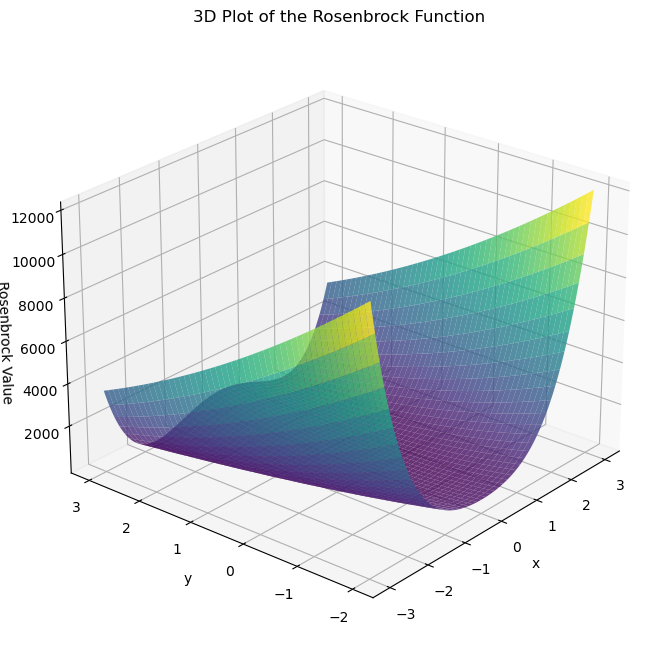

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definición de la función de Rosenbrock
def rosenbrock_function(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Derivadas parciales de la función de Rosenbrock
def rosenbrock_gradients(x):
    df_dx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1])

# Definición del grid para el gráfico
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-2, 3, 500))
z_grid = rosenbrock_function([x_grid, y_grid])

# Creación del gráfico en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie de la función de Rosenbrock
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.8)

# Añadir títulos y etiquetas
ax.set_title('3D Plot of the Rosenbrock Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Rosenbrock Value')

ax.view_init(25, 220)
plt.show()

# I. Método de Descenso por Gradiente:

## Esquema del método de optimización

El descenso por gradiente es un algoritmo de optimización iterativo para encontrar el mínimo de una función. El método consiste en tomar pasos proporcionales al negativo del gradiente (o del aproximado gradiente) de la función en el punto actual.

## Supuestos para su implementación

Para implementar el descenso por gradiente, se asume que la función objetivo es diferenciable y que el gradiente proporciona la dirección de la mayor tasa de incremento de la función.

## Ventajas y desventajas frente a otros métodos vistos

Ventajas:
- Simplicidad y facilidad de implementación.
- Eficiencia en términos de complejidad computacional.

Desventajas:
- Sensibilidad a la selección de la tasa de aprendizaje.
- Convergencia lenta en áreas planas de la función.
- Puede quedar atrapado en mínimos locales si la función no es convexa.

## Implementación a través de un ejemplo

Se muestra a continuación una implementación del método de descenso por gradiente utilizando la función de Rosenbrock.

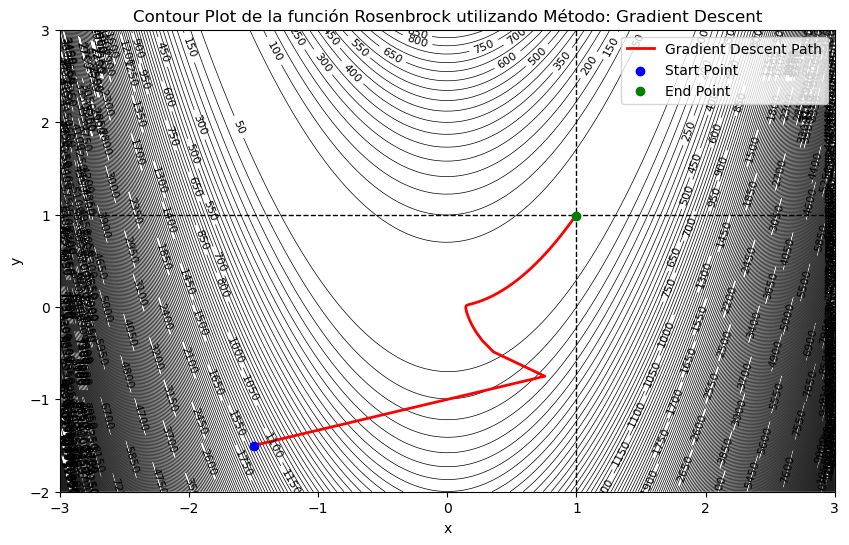

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación del algoritmo de descenso por gradiente
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]
    for _ in range(num_iterations):
        grad = rosenbrock_gradients(x)
        x = x - learning_rate * grad
        history.append(x)
    return np.array(history), rosenbrock_function(x)

# Parámetros del algoritmo (Gradient Descent):
starting_point = np.array([-1.5, -1.5]) # Punto de inicio
learning_rate = 1e-3                  # Tasa de aprendizaje
num_iterations = 10000                # Número de iteraciones

# Ejecución del algoritmo de descenso por gradiente
trajectory, final_value = gradient_descent(starting_point, learning_rate, num_iterations)

# Definición del grid para el gráfico de contorno
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-2, 3, 500))
z_grid = rosenbrock_function([x_grid, y_grid])

# Creación del gráfico de contorno
plt.figure(figsize=(10, 6))
contours = plt.contour(x_grid, y_grid, z_grid, levels=250, linewidths=0.5, colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

# Dibujar la trayectoria del descenso por gradiente
plt.plot(trajectory[:, 0], trajectory[:, 1], color='red', label='Gradient Descent Path', linewidth=2)
plt.scatter(trajectory[0,0], trajectory[0,1], color='blue', label='Start Point', zorder=5)
plt.scatter(trajectory[-1,0], trajectory[-1,1], color='green', label='End Point', zorder=5)

# Agregar líneas negras en x=1 e y=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Añadir títulos y leyendas
plt.title('Contour Plot de la función Rosenbrock utilizando Método: Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Determinación Punto final y Valor Evaluado en F.O.:

In [36]:
print(f'Punto final de optimalidad obtenido: {trajectory[-1]} y Valor evaluado: {final_value}')

Punto final de optimalidad obtenido: [0.99453626 0.98908044] y Valor evaluado: 2.990056460935009e-05


# II. Método de Gradiente Estocástico

## Esquema del método de optimización

El gradiente estocástico es una aproximación del descenso por gradiente que reduce la varianza del gradiente y el costo computacional por iteración al utilizar un subconjunto aleatorio de los datos para calcular el gradiente.

## Supuestos para su implementación

- La función objetivo debe ser diferenciable, al menos en una muestra aleatoria de los datos.
- Es necesario tener un criterio de parada adecuado para evitar el sobreajuste.

## Ventajas y desventajas frente a otros métodos vistos

Ventajas:
- Eficiente con grandes conjuntos de datos.
- Capaz de escapar de mínimos locales debido a la naturaleza estocástica de la actualización.

Desventajas:
- Más ruido en la actualización de los parámetros que puede resultar en convergencia inestable.
- Requiere cuidadosa elección de la tasa de aprendizaje y otros hiperparámetros.

## Implementación a través de un ejemplo

A continuación, se presenta un ejemplo de implementación del método de gradiente estocástico, aplicado a la función de Rosenbrock.


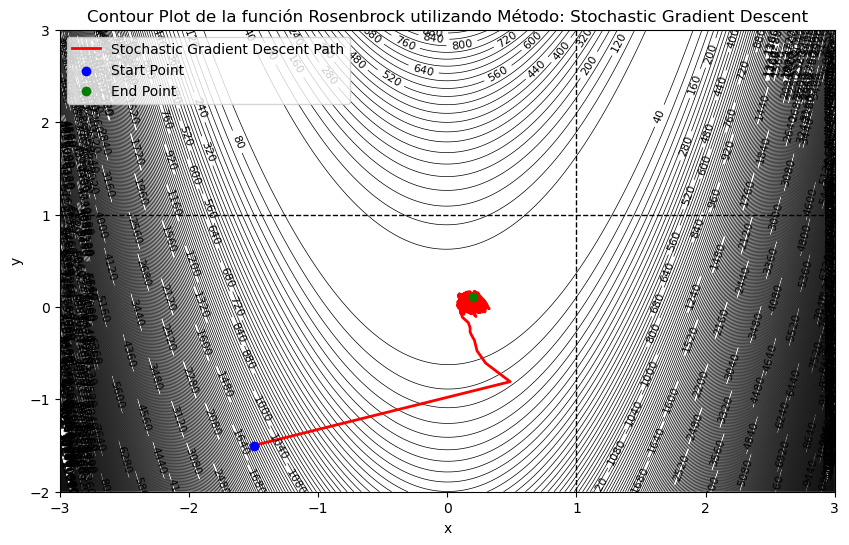

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación del algoritmo de gradiente estocástico
def stochastic_gradient_descent(starting_point, learning_rate, num_iterations, gradient_function):
    x = np.array(starting_point)
    history = [x.copy()]
    
    for _ in range(num_iterations):
        stochastic_point = x + np.random.normal(scale=0.1, size=x.shape)
        grad = gradient_function(stochastic_point)
        x -= learning_rate * grad
        history.append(x.copy())

    return np.array(history), rosenbrock_function(x)

# Parámetros del algoritmo (Stochastic Gradient Descent):
starting_point_sgd = [-1.5, -1.5]  # Punto de inicio para SGD
learning_rate_sgd = 1e-3         # Tasa de aprendizaje para SGD
num_iterations_sgd = 10000        # Número de iteraciones para SGD

# Ejecución del algoritmo de gradiente estocástico
trajectory_sgd, final_value_sgd = stochastic_gradient_descent(
    starting_point_sgd, learning_rate_sgd, num_iterations_sgd, rosenbrock_gradients
)

# Crear el gráfico de contorno para la función de Rosenbrock
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-2, 3, 500))
z_grid = rosenbrock_function([x_grid, y_grid])

plt.figure(figsize=(10, 6))
contours = plt.contour(x_grid, y_grid, z_grid, levels=350, linewidths=0.5, colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

# Dibujar la trayectoria del gradiente estocástico
plt.plot(trajectory_sgd[:, 0], trajectory_sgd[:, 1], color='red', label='Stochastic Gradient Descent Path', linewidth=2)
plt.scatter(trajectory_sgd[0,0], trajectory_sgd[0,1], color='blue', label='Start Point', zorder=5)
plt.scatter(trajectory_sgd[-1,0], trajectory_sgd[-1,1], color='green', label='End Point', zorder=5)

# Agregar líneas negras en x=1 e y=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Añadir títulos y leyendas
plt.title('Contour Plot de la función Rosenbrock utilizando Método: Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Determinación Punto final y Valor Evaluado en F.O.:

In [38]:
print(f'Punto final de optimalidad obtenido: {trajectory_sgd[-1]} y Valor evaluado: {final_value_sgd}')

Punto final de optimalidad obtenido: [0.19912441 0.10384039] y Valor evaluado: 1.053435517315702


# III. Método Quasi-Newton

## Esquema del método de optimización

El método Quasi-Newton es una aproximación de los métodos de Newton para la optimización sin restricciones que no requiere el cálculo de la matriz hessiana completa. En su lugar, se construye una aproximación de la inversa de la hessiana utilizando diferencias de gradientes sucesivas.

## Supuestos para su implementación

- La función objetivo debe ser diferenciable continuamente y preferiblemente dos veces diferenciable.
- Se asume que cerca del óptimo la función puede ser aproximada por una cuadrática.

## Ventajas y desventajas frente a otros métodos vistos

Ventajas:
- Generalmente más rápido que el método del gradiente puro al aproximarse al óptimo.
- No requiere el cálculo de la segunda derivada (hessiano), lo que reduce la carga computacional.

Desventajas:
- Puede ser menos robusto que el método del gradiente puro bajo ciertas condiciones.
- La elección de la aproximación inicial de la inversa de la hessiana puede afectar la convergencia.

## Implementación a través de un ejemplo

El siguiente es un ejemplo de implementación del método Quasi-Newton utilizando el algoritmo BFGS para minimizar la función de Rosenbrock, incluyendo la trayectoria de optimización en un gráfico de contorno.


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 68
         Gradient evaluations: 68


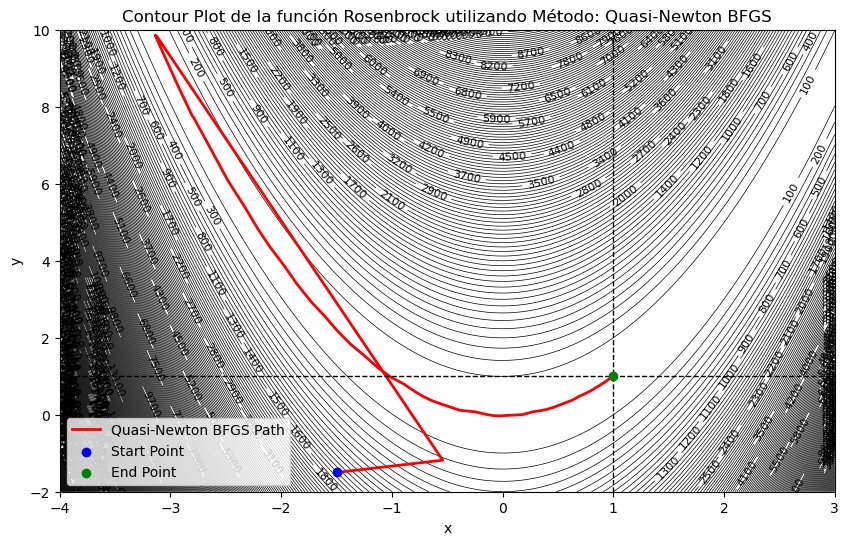

In [54]:
import numpy as np
from scipy.optimize import minimize

# Función para registrar la trayectoria del algoritmo
trajectory_qn = [np.array([-1.5, -1.5])]  # Lista para almacenar la trayectoria
def record_trajectory(xk):
    trajectory_qn.append(xk.copy())

# Ejecución del algoritmo Quasi-Newton BFGS con registro de la trayectoria
result_qn_with_trajectory = minimize(
    rosenbrock_function, 
    trajectory_qn[0], 
    jac=rosenbrock_gradients, 
    method='BFGS', 
    callback=record_trajectory,
    options={'disp': True}
)

# Crear el gráfico de contorno para la función de Rosenbrock
x_grid, y_grid = np.meshgrid(np.linspace(-4, 3, 700), np.linspace(-2, 10, 1200))
z_grid = rosenbrock_function([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

plt.figure(figsize=(10, 6))
contours = plt.contour(x_grid, y_grid, z_grid, levels=350, linewidths=0.5, colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

# Convertir la trayectoria a un array de numpy para facilitar el gráfico
trajectory_qn = np.array(trajectory_qn)
final_value_qn = result_qn_with_trajectory.fun

# Dibujar la trayectoria del Quasi-Newton BFGS
plt.plot(trajectory_qn[:, 0], trajectory_qn[:, 1], color='red', label='Quasi-Newton BFGS Path', linewidth=2)
plt.scatter(trajectory_qn[0, 0], trajectory_qn[0, 1], color='blue', label='Start Point', zorder=5)
plt.scatter(trajectory_qn[-1, 0], trajectory_qn[-1, 1], color='green', label='End Point', zorder=5)

# Agregar líneas negras en x=1 e y=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Añadir títulos y leyendas
plt.title('Contour Plot de la función Rosenbrock utilizando Método: Quasi-Newton BFGS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [55]:
print(f'Punto final de optimalidad obtenido: {trajectory_qn[-1]} y Valor evaluado: {final_value_qn}')

Punto final de optimalidad obtenido: [1.00000004 1.00000008] y Valor evaluado: 1.8040673091238633e-15


# IV. Método Simulated Annealing

## Esquema del método de optimización

Simulated Annealing es una técnica probabilística para aproximar el mínimo global de una función dada. Inspirado en el proceso de recocido en metalurgia, este método se caracteriza por su capacidad de evitar quedarse atrapado en mínimos locales al permitir movimientos ascendentes temporales en la búsqueda del mínimo global.

## Supuestos para su implementación

- La función objetivo puede ser no lineal y no diferenciable.
- Se necesita una función de temperatura que se reduzca gradualmente.
- Se pueden requerir límites para las variables si el espacio de búsqueda no es finito.

## Ventajas y desventajas frente a otros métodos vistos

Ventajas:
- Capaz de evitar quedarse atrapado en mínimos locales gracias a su capacidad de aceptar soluciones peores al principio.
- Aplicable a una amplia variedad de problemas de optimización.

Desventajas:
- La convergencia al mínimo global no está garantizada.
- La elección de la función de enfriamiento y los parámetros del algoritmo pueden afectar significativamente el rendimiento y los resultados.

## Implementación a través de un ejemplo

A continuación se presenta un ejemplo de implementación del método Simulated Annealing aplicado a la función de Rosenbrock. Se incluye la visualización de la trayectoria de optimización sobre un gráfico de contorno.


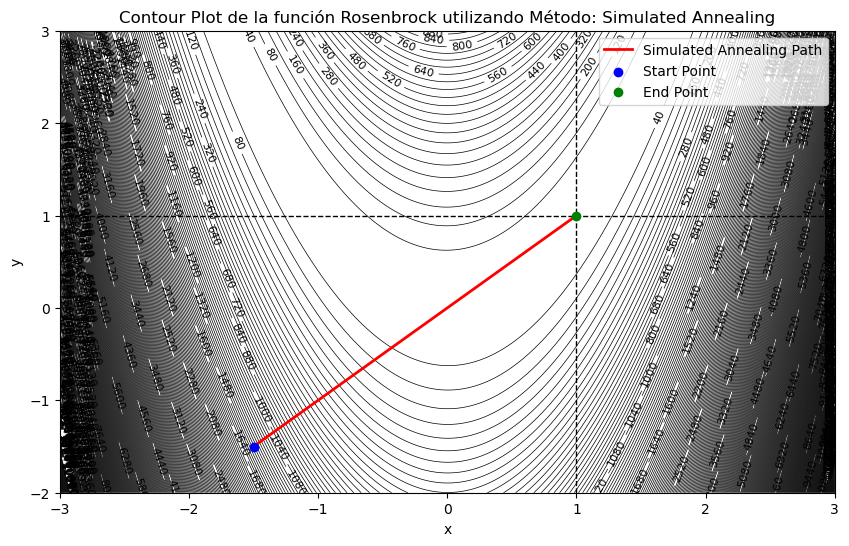

In [56]:
from scipy.optimize import basinhopping

# Punto de inicio para el Simulated Annealing
starting_point_sa = np.array([-1.5, -1.5])

# Clase para registrar la trayectoria del algoritmo
trajectory_sa = [starting_point_sa]  # Lista para almacenar la trayectoria
def record_trajectory(x, f, accept):
    trajectory_sa.append(x.copy())

# Clase para personalizar el algoritmo de Simulated Annealing
class MyTakeStep:
    def __init__(self, stepsize=0.5):
        self.stepsize = stepsize
    def __call__(self, x):
        s = self.stepsize
        x[0] += np.random.uniform(-s, s)
        x[1] += np.random.uniform(-s, s)
        return x

# Clase para imponer límites durante el Simulated Annealing
class MyBounds:
    def __init__(self, xmax=[3, 3], xmin=[-3, -2]):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

# Configuración de los parámetros para Simulated Annealing
take_step = MyTakeStep(stepsize=0.5)
minimizer_kwargs = {"method": "BFGS", "jac": rosenbrock_gradients}
bounds = MyBounds(xmax=[3, 3], xmin=[-3, -2])

# Ejecución del algoritmo Simulated Annealing con registro de la trayectoria
result_sa = basinhopping(rosenbrock_function, starting_point_sa, niter=200, 
                         minimizer_kwargs=minimizer_kwargs, take_step=take_step, 
                         accept_test=bounds, callback=record_trajectory)

# Convertir la trayectoria a un array de numpy para facilitar el gráfico
trajectory_sa = np.array(trajectory_sa)
final_value_sa = result_sa.fun

# Crear el gráfico de contorno para la función de Rosenbrock
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-2, 3, 500))
z_grid = rosenbrock_function([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

plt.figure(figsize=(10, 6))
contours = plt.contour(x_grid, y_grid, z_grid, levels=350, linewidths=0.5, colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

# Gráfico de contorno con la trayectoria del Simulated Annealing
plt.plot(trajectory_sa[:, 0], trajectory_sa[:, 1], color='red', label='Simulated Annealing Path', linewidth=2)
plt.scatter(trajectory_sa[0, 0], trajectory_sa[0, 1], color='blue', label='Start Point', zorder=5)
plt.scatter(trajectory_sa[-1, 0], trajectory_sa[-1, 1], color='green', label='End Point', zorder=5)

plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

plt.title('Contour Plot de la función Rosenbrock utilizando Método: Simulated Annealing')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [57]:
print(f'Punto final de optimalidad obtenido: {trajectory_sa[-1]} y Valor evaluado: {final_value_sa}')

Punto final de optimalidad obtenido: [0.99999998 0.99999994] y Valor evaluado: 3.2633548377966543e-21


# Gráfico de Barra comparativo con valores finales:

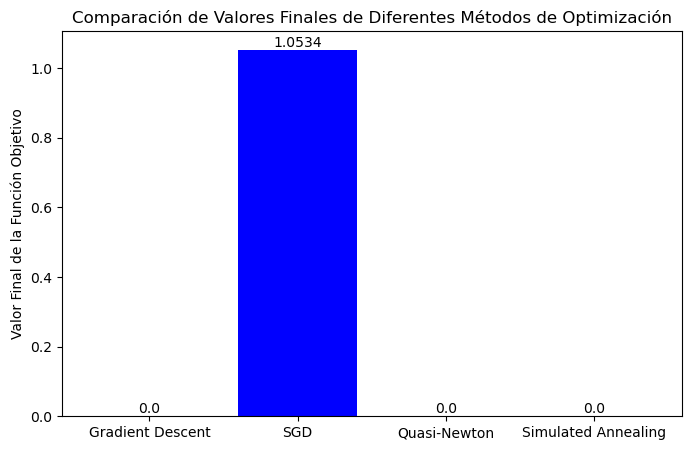

In [65]:
import matplotlib.pyplot as plt

# Nombres de los métodos para etiquetas en el eje x
methods = ['Gradient Descent','SGD', 'Quasi-Newton', 'Simulated Annealing']

# Valores finales para cada método
final_values_model = [final_value, final_value_sgd, final_value_qn, final_value_sa]

# Creación del gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = plt.bar(methods, final_values_model, color=['red', 'blue', 'green', 'purple'])

# Añadir título y etiquetas a los ejes
plt.title('Comparación de Valores Finales de Diferentes Métodos de Optimización')
plt.ylabel('Valor Final de la Función Objetivo')

# Añadir los valores en las barras
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

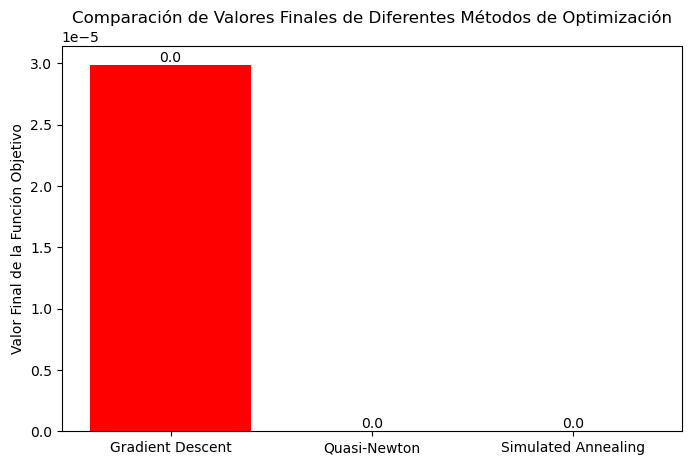

In [66]:
import matplotlib.pyplot as plt

# Nombres de los métodos para etiquetas en el eje x
methods = ['Gradient Descent','Quasi-Newton', 'Simulated Annealing']

# Valores finales para cada método
final_values_model = [final_value, final_value_qn, final_value_sa]

# Creación del gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = plt.bar(methods, final_values_model, color=['red', 'green', 'purple'])

# Añadir título y etiquetas a los ejes
plt.title('Comparación de Valores Finales de Diferentes Métodos de Optimización')
plt.ylabel('Valor Final de la Función Objetivo')

# Añadir los valores en las barras
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

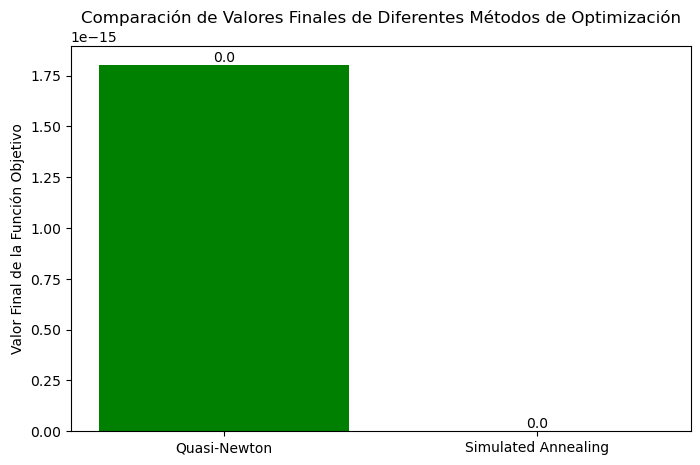

In [67]:
import matplotlib.pyplot as plt

# Nombres de los métodos para etiquetas en el eje x
methods = ['Quasi-Newton', 'Simulated Annealing']

# Valores finales para cada método
final_values_model = [final_value_qn, final_value_sa]

# Creación del gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = plt.bar(methods, final_values_model, color=['green', 'purple'])

# Añadir título y etiquetas a los ejes
plt.title('Comparación de Valores Finales de Diferentes Métodos de Optimización')
plt.ylabel('Valor Final de la Función Objetivo')

# Añadir los valores en las barras
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

# Cuadro Comparativo:

In [76]:
# Crear un cuadro comparativo
print("Cuadro Comparativo de Resultados de Optimización\n")
print(f"{'Método':<30} {'Punto Final':<30} {'Valor Evaluado'}")
print("-" * 70)

print(f"{'Gradient Descent':<30} {trajectory[-1]} {final_value:.21f}")
print(f"{'Stochastic Gradient Descent':<30} {trajectory_sgd[-1]} {final_value_sgd:.21f}")
print(f"{'Quasi-Newton':<30} {trajectory_qn[-1]} {final_value_qn:.21f}")
print(f"{'Simulated Annealing':<30} {trajectory_sa[-1]} {final_value_sa:.21f}")

Cuadro Comparativo de Resultados de Optimización

Método                         Punto Final                    Valor Evaluado
----------------------------------------------------------------------
Gradient Descent               [0.99453626 0.98908044] 0.000029900564609350089
Stochastic Gradient Descent    [0.19912441 0.10384039] 1.053435517315701952512
Quasi-Newton                   [1.00000004 1.00000008] 0.000000000000001804067
Simulated Annealing            [0.99999998 0.99999994] 0.000000000000000000003


Al evaluar los gráficos de trayectoria para los métodos de optimización aplicados a la función de Rosenbrock:

- Simulated Annealing: La trayectoria comienza lejos del mínimo y se dirige de manera directa hacia el óptimo global, terminando muy cerca del punto [1,1], que es el mínimo global de la función de Rosenbrock. Esto indica una eficiente exploración del espacio de búsqueda y una buena convergencia.

- Quasi-Newton BFGS: Este método muestra una trayectoria que parece oscilar antes de acercarse al punto óptimo. A pesar de la ruta indirecta, termina en un punto muy próximo al óptimo global, lo que demuestra su capacidad para superar las oscilaciones y converger efectivamente.

- Stochastic Gradient Descent: La trayectoria indica una ruta errática y termina en un punto que está lejos del óptimo global. Esto puede ser indicativo de la naturaleza estocástica del método y posiblemente una tasa de aprendizaje que no es la ideal para este problema en particular.

- Gradient Descent: La trayectoria muestra un camino curvo hacia el mínimo global y termina cerca del óptimo global, aunque la ruta no es tan directa como la de Simulated Annealing.

Basándonos en la proximidad final al mínimo global y la eficiencia de la trayectoria (medida por la directriz del camino hacia el óptimo), el **Simulated Annealing** parece ser el método más óptimo entre los presentados. Aunque tanto Simulated Annealing como Quasi-Newton terminan cerca del mínimo global, la trayectoria de Simulated Annealing es más directa, lo que podría indicar una búsqueda más eficiente en este caso específico.

El Gradient Descent también parece ser efectivo pero su camino es menos directo que el Simulated Annealing. El Stochastic Gradient Descent parece ser el menos efectivo de los cuatro, posiblemente debido a la elección de hiperparámetros o la naturaleza del problema que no se adecua tan bien a este método.

Es importante mencionar que una sola ejecución de estos métodos no es suficiente para llegar a una conclusión definitiva. La robustez de estos métodos se evalúa mejor a través de múltiples ejecuciones, considerando la variabilidad en los caminos debido a la naturaleza estocástica o heurística de algunos de los algoritmos.